# Introducción 
La presente investigación tiene como objetivo principal realizar un análisis de datos exhaustivo sobre los delitos ocurridos en la Ciudad de Buenos Aires en el período comprendido entre los años 2016 y 2021. Este proyecto busca explorar y comprender en profundidad el panorama delictivo en una de las ciudades más grandes y emblemáticas de América Latina.

La importancia de esta investigación radica en la vasta cantidad de información recopilada y puesta a disposición por parte de la Ciudad de Buenos Aires. La disponibilidad de datos confiables y detallados sobre los delitos cometidos en la ciudad proporciona una oportunidad invaluable para comprender las tendencias delictivas a lo largo del tiempo, identificar patrones, y formular estrategias de prevención y seguridad pública basadas en evidencia.

#  Contexto - Preguntas de Negocio
La recopilación y gestión de datos sobre delitos es fundamental para la toma de decisiones informadas por parte de las autoridades y la comunidad en general. La Ciudad de Buenos Aires ha demostrado su compromiso con la transparencia y la rendición de cuentas al proporcionar acceso a esta información, lo que permite a investigadores, analistas y ciudadanos interesados profundizar en el estudio de la seguridad urbana y colaborar en la construcción de soluciones efectivas.

A lo largo de este documento, se realizará un análisis detallado de los datos disponibles, se explorarán las variaciones en la incidencia delictiva a lo largo de los años y se identificarán los delitos más comunes en diferentes áreas de la ciudad. Además, se pretende evaluar cómo ciertos eventos o circunstancias pueden haber influido en los patrones de delincuencia, por ejemplo el efecto Covid-19.

En resumen, este proyecto de análisis de datos sobre delitos en la Ciudad de Buenos Aires no solo busca informar sobre la situación delictiva, sino también destacar el esfuerzo y la importancia de la Ciudad en la recopilación y accesibilidad de estos datos, contribuyendo así a la toma de decisiones más informadas y a la mejora de la calidad de vida de sus habitantes.

## Preguntas a responder.
1. Cual es el Barrio con mayor incidencia de delitos. Indicador promedio de delitos mensual. 
2. Durante la pandemia el numero de delitos semanales disminuyo? En que magnitud? Analisis en el Top 5 de barrios inseguros de la pregunta 1.
3. Todos los dias de la semana tienen el mayor riesgo en cuando a la incidencia de delitos?
4. Cuales son las horas del dia con mayor numero de delitos?

# Propuesta de Solución - Desarrollo

A continuación se presenta el desarrollo de la resolución explicando el código desarrollado.

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
import os
import sqlite3

### Set de Datos Disponibles

In [4]:
link_2016 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/mapa-del-delito/delitos_2016.csv"
link_2017 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/mapa-del-delito/delitos_2017.csv"
link_2018 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/mapa-del-delito/delitos_2018.csv"
link_2019 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2019.csv"
link_2020 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/mapa-del-delito/delitos_2020.csv"
link_2021 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2021.csv"

In [21]:
# pd.read_csv(link_2019, sep=',', low_memory=False).loc[:,['fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long']].to_csv('./data/delitos_2019.csv')
# pd.read_csv(link_2018, sep=',', low_memory=False).loc[:,['fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long']].to_csv('./data/delitos_2018.csv')
# pd.read_csv(link_2017, sep=',', low_memory=False).loc[:,['fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long']].to_csv('./data/delitos_2017.csv')
# pd.read_csv(link_2016, sep=',', low_memory=False).loc[:,['fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long']].to_csv('./data/delitos_2016.csv')
# pd.read_csv(link_2021, sep=';').loc[:,['fecha', 'franja', 'tipo', 'barrio', 'comuna', 'latitud', 'longitud']].to_csv('/data/delitos_2021.csv')
#pd.read_csv(link_2020, sep=',', low_memory=False).loc[:,['fecha', 'franja', 'tipo', 'barrio', 'comuna', 'latitud', 'longitud']]#.to_csv('./data/delitos_2020.csv')

In [5]:
links =[link_2016, link_2017, link_2018,link_2019, link_2020, link_2021]


### Extracción, Carga y Transformación

Se define una función de extracción, transformación y carga para respaldar los datos de manera física.

1. Creación de Carpeta de Almacenamiento:

+ La función `os.mkdir()` se utiliza para crear una carpeta (directorio) llamada "datalake" en el directorio actual (donde se encuentra el script de Python) para almacenar los archivos resultantes. Si la carpeta ya existe, se manejará la excepción `FileExistsError`.

2. Bucle para Procesar Archivos:

+ Se inicia un bucle for para recorrer una lista de enlaces (links) que se supone que contienen los datos de los delitos correspondientes a diferentes años.

+ Se extrae el año del enlace analizando el nombre del archivo. Esto se hace dividiendo el nombre del archivo por "_", tomando los primeros 4 caracteres después del primer guion bajo (por ejemplo, "delitos_2016.csv" daría como resultado "2016").

+ Luego, se intenta leer y procesar cada archivo CSV de acuerdo al año extraído.

3. Procesamiento de Datos por Año:

* Para los años 2016 a 2019:

    + Los archivos se leen utilizando pd.read_csv() con un separador de coma (",") y se seleccionan las columnas específicas ('fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long').
    + La columna 'fecha' se convierte en objetos de fecha y hora utilizando pd.to_datetime().
    + Los datos se guardan en un archivo CSV en la carpeta "datalake" con un nombre que incluye el año correspondiente, por ejemplo, "delitos_2016.csv".
    + Los datos se agregan a una lista de DataFrames (dfs) para su posterior concatenación.

* Para el año 2020:

    + Los archivos se leen con un separador de coma (",") y se seleccionan las mismas columnas que en los años anteriores.
    + Se renombran las columnas para que coincidan con las de años anteriores ('fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long').
    + La columna 'fecha' se convierte en objetos de fecha y hora utilizando pd.to_datetime(), especificando el formato correcto ("%d/%m/%Y").
    + Los datos se guardan en un archivo CSV en la carpeta "datalake" con un nombre que incluye el año correspondiente, por ejemplo, "delitos_2020.csv".
    + Los datos se agregan a la lista dfs.

* Para el año 2021:

    + Los archivos se leen con un separador de punto y coma (";") y se seleccionan las mismas columnas que en los años anteriores.
    + Se renombran las columnas para que coincidan con las de años anteriores ('fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long').
    + La columna 'fecha' se convierte en objetos de fecha y hora utilizando pd.to_datetime().
    + Los datos se guardan en un archivo CSV en la carpeta "datalake" con un nombre que incluye el año correspondiente, por ejemplo, "delitos_2021.csv".
    + Los datos se agregan a la lista dfs.

4. Consolidación de Datos:

+ Finalmente, se utiliza pd.concat() para combinar todos los DataFrames almacenados en dfs en un solo DataFrame llamado "consolidado". Esto une todos los datos de los diferentes años en uno solo.

+ El DataFrame consolidado se guarda en un archivo CSV llamado "delitos_consolidado.csv" en la carpeta "datalake".

5. Resultado:

+ La función devuelve el DataFrame consolidado que contiene todos los datos de delitos de los años procesados.

En resumen, este código se encarga de leer archivos CSV de diferentes años, procesar los datos y consolidarlos en un solo archivo CSV. También crea una carpeta llamada "datalake" para almacenar los archivos resultantes. Además, maneja posibles errores durante el proceso de lectura y procesamiento de datos.

In [19]:
def extract_load(links):
    ruta_carpeta = './datalake'
    # Utiliza la función mkdir() para crear la carpeta
    try:
        os.mkdir(ruta_carpeta)
        print(f'Se ha creado la carpeta en {ruta_carpeta}')
    except FileExistsError:
        print(f'La carpeta {ruta_carpeta} ya existe.')
    except Exception as e:
        print(f'Error al crear la carpeta: {str(e)}')
        
    dfs = []
    for link in links:
        anio = int(link.split("_")[1][0:4])
        try:
            if anio in [2016, 2017, 2018, 2019] :
                #print(f"procesando datos de {anio}")
                data = pd.read_csv(link, sep=',', low_memory=False).loc[:,['fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long']]
                data["fecha"] = pd.to_datetime(data["fecha"])
                data.to_csv(f'./datalake/delitos_{anio}.csv')
                dfs.append(data)
            elif anio == 2020:
                data = pd.read_csv(link_2020, sep=',', low_memory=False).loc[:,['fecha', 'franja', 'tipo', 'barrio', 'comuna', 'latitud', 'longitud']]
                data.columns = ['fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long']
                data["fecha"] = pd.to_datetime(data["fecha"], format="%d/%m/%Y")
                data.to_csv(f'./datalake/delitos_{anio}.csv')
                dfs.append(data)
            elif anio == 2021:
                data = pd.read_csv(link_2021, sep=';',low_memory=False).loc[:,['fecha', 'franja', 'tipo', 'barrio', 'comuna', 'latitud', 'longitud']]
                data.columns = ['fecha', 'franja_horaria', 'tipo_delito', 'barrio', 'comuna', 'lat', 'long']
                data["fecha"] = pd.to_datetime(data["fecha"])
                data.to_csv(f'./datalake/delitos_{anio}.csv')
                dfs.append(data)
            else:
                print("El dataset no esta en los años con disponibilidad de delitos")
        except Exception as e:
            # Manejar la excepción, por ejemplo, imprimir un mensaje de error
            print(f"No se pudo leer el enlace {link}: {str(e)}")
    consolided = pd.concat(dfs, ignore_index=True)
    consolided.to_csv(f'./datalake/delitos_consolidado.csv')
    return consolided

In [20]:
extract_load(links)

La carpeta ./datalake ya existe.


,fecha,franja_horaria,tipo_delito,barrio,comuna,lat,long
0,2016-01-01,13,Robo (con violencia),Parque Avellaneda,9.0,-34.6487,-58.4685
1,2016-01-01,22,Robo (con violencia),Palermo,14.0,-34.5769,-58.4074
2,2016-01-01,1,Lesiones,Parque Patricios,4.0,-34.6452,-58.4011
3,2016-01-01,19,Hurto (sin violencia),Parque Avellaneda,9.0,-34.6558,-58.4787
4,2016-01-01,4,Robo (con violencia),Caballito,6.0,-34.6241,-58.4368
...,...,...,...,...,...,...,...
648640,2021-08-05,10,Hurto (sin violencia),Balvanera,3.0,"-34,605751","-58,395375"
648641,2021-06-29,21,Robo (con violencia),Palermo,14.0,"-34,59266","-58,422338"
648642,2021-06-30,13,Robo (con violencia),Balvanera,3.0,"-34,608791","-58,404617"
648643,2021-07-31,1,Hurto (sin violencia),Balvanera,3.0,"-34,603284","-58,394526"


### Exploración y Limpieza de Datos

Una vez respaldado el dataset compilado se lo carga como variables para comenzar el trabajo de exploración y análisis.

In [53]:
delitos = pd.read_csv("./datalake/delitos_consolidado.csv",  low_memory=False).drop("Unnamed: 0", axis=1)
delitos["fecha"] = pd.to_datetime(delitos["fecha"])

In [54]:
def safe_float_conversion(value):
    try:
        return float(value.replace(',', '.'))
    except (ValueError, AttributeError):
        return np.nan

In [55]:
delitos["lat"] = delitos["lat"].apply(safe_float_conversion)
delitos["long"] = delitos["long"].apply(safe_float_conversion)
delitos["franja_horaria"] = delitos["franja_horaria"].apply(safe_float_conversion)

In [56]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648645 entries, 0 to 648644
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha           648645 non-null  datetime64[ns]
 1   franja_horaria  646551 non-null  float64       
 2   tipo_delito     648645 non-null  object        
 3   barrio          638598 non-null  object        
 4   comuna          639115 non-null  float64       
 5   lat             638598 non-null  float64       
 6   long            638598 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 34.6+ MB


El dataset tiene un total de 648.645 filas y 7 columnas.

In [57]:
delitos.shape

(648645, 7)

La cantidad de datos nulos es despresiable respecto del total de filas. Por lo cual se decide eliminar los registros nulos.

In [58]:
delitos.isna().sum()

fecha                 0
franja_horaria     2094
tipo_delito           0
barrio            10047
comuna             9530
lat               10047
long              10047
dtype: int64

In [59]:
delitos = delitos.dropna()

In [60]:
delitos.sample(10)

,fecha,franja_horaria,tipo_delito,barrio,comuna,lat,long
120413,2016-12-12,0.0,Robo (con violencia),Palermo,14.0,-34.593672,-58.421661
394304,2019-06-30,22.0,Robo (con violencia),Vélez Sársfield,10.0,-34.634356,-58.483369
79556,2016-08-20,11.0,Robo (con violencia),San Cristóbal,3.0,-34.627654,-58.407211
529609,2020-09-01,17.0,Robo (con violencia),Villa Crespo,15.0,-34.599873,-58.438768
93639,2016-09-29,0.0,Robo (con violencia),Nueva Pompeya,4.0,-34.643855,-58.427227
13080,2016-02-11,18.0,Robo (con violencia),Nuñez,13.0,-34.557858,-58.467193
209889,2017-09-14,19.0,Robo (con violencia),Parque Chacabuco,7.0,-34.642784,-58.444269
12525,2016-02-09,2.0,Robo (con violencia),Palermo,14.0,-34.594461,-58.425962
276495,2018-03-28,6.0,Robo (con violencia),Villa Lugano,8.0,-34.670822,-58.475362
50928,2016-05-29,1.0,Robo (con violencia),Chacarita,15.0,-34.595396,-58.453356


In [40]:
ts = delitos.groupby(["fecha"], as_index=False)["tipo_delito"].count().set_index('fecha').dropna()

### Exploración de Datos

La pandemia de COVID-19 ha tenido un impacto significativo en la comisión y la tipología de delitos en todo el mundo. A continuación, se presentan algunas el comportamiento de los delitos a lo largo del tiempo para la Ciudad de Buenos Aires.

Se puede observar una caida en la ocurrencia de delitos durante la pandemia.

In [41]:
fig = px.line()

# Calcular la media móvil de 10 periodos
ts['media_movil'] = ts['tipo_delito'].rolling(window=50).mean()

# Agregar la serie de tiempo con transparencia
fig.add_trace(go.Scatter(x=ts.index, y=ts['tipo_delito'], mode='lines', name='Delitos Seria Temporal Diaria',
                        line=dict(color='blue'), opacity=0.4))  # Color azul con transparencia

# Agregar la media móvil con un color distinguible
fig.add_trace(go.Scatter(x=ts.index, y=ts['media_movil'], mode='lines', name='Media Móvil (50 períodos)',
                         line=dict(color='red')))  # Color rojo


# Personalizar el diseño del gráfico
fig.update_layout(xaxis_title='Fecha', yaxis_title='Cantidad de Delitos',legend=dict(x=0, y=1))
fig.show()

El código y gráfico anterios utiliza la biblioteca Plotly Express para crear un gráfico de serie de tiempo con una media móvil de 50 períodos y personaliza su apariencia. A continuación, se explican los pasos:

+ fig = px.line(): Esto crea una figura vacía para el gráfico de línea utilizando Plotly Express. La figura se almacena en la variable fig y se usará para construir el gráfico.

+ ts['media_movil'] = ts['tipo_delito'].rolling(window=50).mean(): Calcula la media móvil de 50 períodos de la columna 'tipo_delito' y la almacena en una nueva columna llamada 'media_movil' en el DataFrame ts. Esto suaviza la serie de tiempo original.

+ fig.add_trace(go.Scatter(...)): Agrega trazos al gráfico. En este caso, se agregan dos trazos (líneas).

+ El primer trazo representa la serie de tiempo original de delitos diarios. Utiliza el modo 'lines' para trazar líneas entre los puntos de datos. El color de las líneas se establece en azul y se agrega cierta transparencia (0.4) para que el gráfico sea más legible.

+ El segundo trazo representa la media móvil calculada. Utiliza el modo 'lines' para trazar líneas entre los puntos de datos. El color de las líneas se establece en rojo.

+ fig.update_layout(...): Personaliza el diseño del gráfico. En este caso:

+ xaxis_title y yaxis_title establecen los títulos de los ejes X e Y, respectivamente.
+ legend controla la posición de la leyenda en el gráfico, con coordenadas (x, y). En este caso, se coloca en la esquina superior derecha.
+ fig.show(): Muestra el gráfico resultante en la salida.

En resumen, este código utiliza Plotly Express para crear un gráfico de serie de tiempo que muestra los datos de delitos diarios junto con una media móvil de 50 períodos. El gráfico resultante tiene dos líneas: una en azul (para los datos originales) y otra en rojo (para la media móvil), con una leyenda en la esquina superior derecha y títulos en los ejes X e Y.

### Respuestas de Negocio.
1. Cual es el Barrio con mayor incidencia de delitos. Indicador promedio de delitos mensual. 
2. Durante la pandemia el numero de delitos semanales disminuyo? En que magnitud? Analisis en el Top 5 de barrios inseguros de la pregunta 1.
3. Todos los dias de la semana tienen el mayor riesgo en cuando a la incidencia de delitos?
4. Cuales son las horas del dia con mayor numero de delitos?

In [4]:
ruta_carpeta = './sql'
# Utiliza la función mkdir() para crear la carpeta
try:
    os.mkdir(ruta_carpeta)
    print(f'Se ha creado la carpeta en {ruta_carpeta}')
except FileExistsError:
    print(f'La carpeta {ruta_carpeta} ya existe.')
except Exception as e:
    print(f'Error al crear la carpeta: {str(e)}')

Se ha creado la carpeta en ./sql


In [5]:
conn = sqlite3.connect('./sql/delitos.db')

#### 1. Promedios de Delitos Mensuales - Barrio

In [69]:
delitos['periodo'] = 'PrePandemia'
delitos.loc[delitos['fecha'] >= '2020-03-01', 'periodo'] = 'PostPandemia'

In [70]:
delitos.head()

,fecha,franja_horaria,tipo_delito,barrio,comuna,lat,long,periodo
0,2016-01-01,13.0,Robo (con violencia),Parque Avellaneda,9.0,-34.648730,-58.468536,PrePandemia
1,2016-01-01,22.0,Robo (con violencia),Palermo,14.0,-34.576925,-58.407400,PrePandemia
2,2016-01-01,1.0,Lesiones,Parque Patricios,4.0,-34.645197,-58.401099,PrePandemia
3,2016-01-01,19.0,Hurto (sin violencia),Parque Avellaneda,9.0,-34.655760,-58.478681,PrePandemia
4,2016-01-01,4.0,Robo (con violencia),Caballito,6.0,-34.624128,-58.436826,PrePandemia


In [80]:
conteo_barrio = delitos.groupby(['periodo','fecha', 'barrio']).count().reset_index()[['periodo','fecha','barrio','tipo_delito']].rename(columns={'tipo_delito': 'conteo'})
conteo_barrio

,periodo,fecha,barrio,conteo
0,PostPandemia,2020-03-01,Agronomía,1
1,PostPandemia,2020-03-01,Almagro,10
2,PostPandemia,2020-03-01,Balvanera,25
3,PostPandemia,2020-03-01,Barracas,7
4,PostPandemia,2020-03-01,Belgrano,10
...,...,...,...,...
95330,PrePandemia,2020-02-29,Villa Pueyrredón,2
95331,PrePandemia,2020-02-29,Villa Riachuelo,1
95332,PrePandemia,2020-02-29,Villa Santa Rita,1
95333,PrePandemia,2020-02-29,Villa Soldati,7


In [97]:
conteo_barrio.groupby(['periodo', 'barrio']).mean().reset_index().sort_values(['barrio','conteo','periodo' ], ascending=False)

,periodo,barrio,conteo
97,PrePandemia,Vélez Sársfield,3.463939
48,PostPandemia,Vélez Sársfield,2.199623
96,PrePandemia,Villa del Parque,4.119298
95,PrePandemia,Villa Urquiza,7.160927
47,PostPandemia,Villa Urquiza,4.501603
...,...,...,...
2,PostPandemia,Balvanera,13.288490
50,PrePandemia,Almagro,13.662722
1,PostPandemia,Almagro,8.306647
49,PrePandemia,Agronomía,1.849492


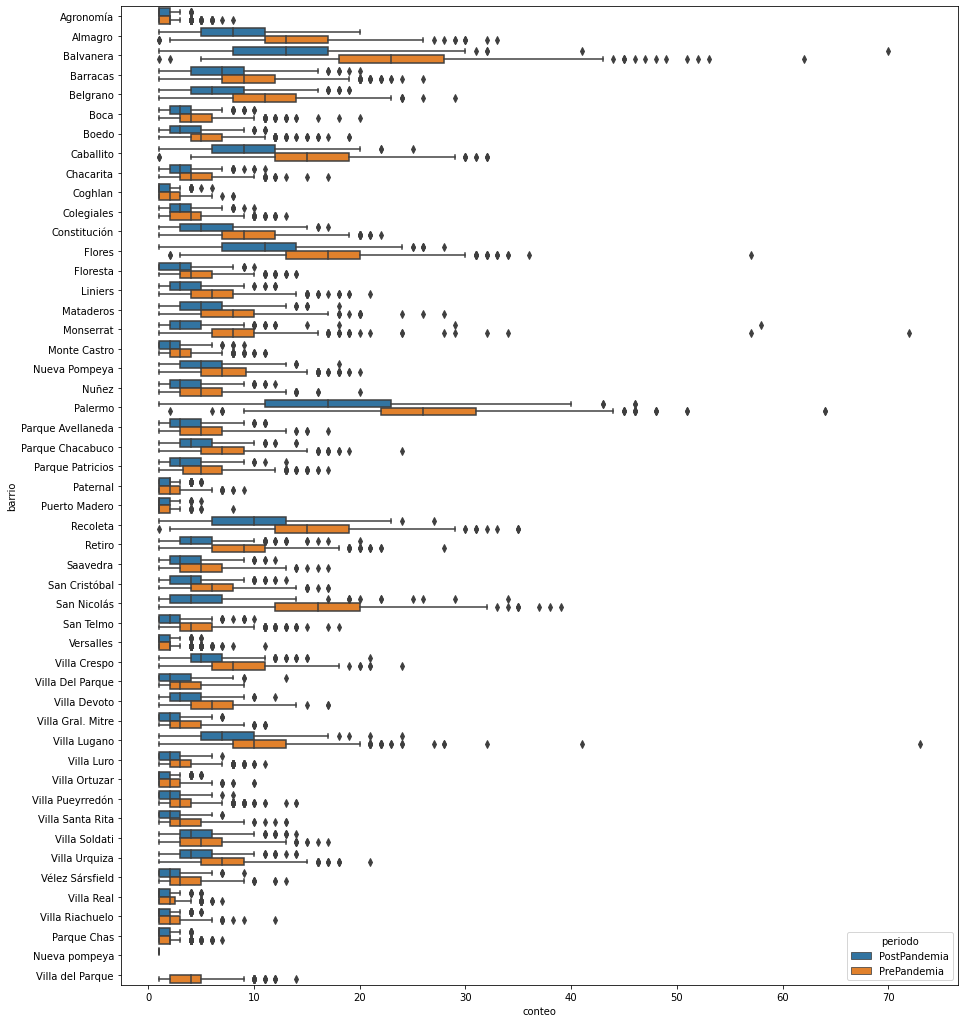

In [86]:
plt.figure(figsize=(15, 18))
sns.boxplot( data = conteo_barrio, y='barrio', x ='conteo', hue='periodo' )
plt.show()

In [181]:
delitos.loc[delitos['long']<-59]

,fecha,franja_horaria,tipo_delito,barrio,comuna,lat,long
493551,2020-12-28,5.0,Homicidio,Retiro,1.0,-34.580131,-58382.0
493701,2020-08-01,13.0,Lesiones,Flores,7.0,-34.646064,-58463.0
496910,2020-01-08,15.0,Lesiones,Palermo,14.0,-34.581787,-58428.0
501125,2020-07-01,7.0,Hurto (sin violencia),Belgrano,13.0,-34.556832,-58443.0
501587,2020-09-01,10.0,Hurto (sin violencia),Parque Patricios,4.0,-34.637221,-58393.0
...,...,...,...,...,...,...,...
556542,2020-12-14,13.0,Robo (con violencia),San Nicolás,1.0,-34.600248,-58381.0
556950,2020-12-02,8.0,Robo (con violencia),San Telmo,1.0,-34.623287,-58374.0
558306,2020-02-26,21.0,Robo (con violencia),Caballito,6.0,-34.622270,-58445.0
558704,2020-02-03,18.0,Hurto (sin violencia),Belgrano,13.0,-34.560382,-58454.0


In [178]:
delitos.loc[delitos['lat']<-35]

,fecha,franja_horaria,tipo_delito,barrio,comuna,lat,long
493376,2020-02-27,2.0,Homicidio,Villa Devoto,11.0,-34616.0,-58.513983
493490,2020-10-08,4.0,Homicidio,Chacarita,15.0,-34585.0,-58.457319
493949,2020-01-20,9.0,Lesiones,Villa Del Parque,11.0,-34597.0,-58.495410
494620,2020-12-02,19.0,Lesiones,Constitución,1.0,-34621.0,-58.382976
494654,2020-02-13,18.0,Lesiones,Liniers,9.0,-34652.0,-58.519819
...,...,...,...,...,...,...,...
555032,2020-02-10,NaN,Hurto (sin violencia),Flores,7.0,-34651.0,-58.446100
555105,2020-10-10,21.0,Robo (con violencia),Boca,4.0,-34624.0,-58349.000000
557398,2020-02-16,21.0,Robo (con violencia),Villa Soldati,8.0,-34662.0,-58.445701
558077,2020-02-24,1.0,Robo (con violencia),Caballito,6.0,-34614.0,-58.433392


In [ ]:
ggplot() + 
  geom_sf(data = radios, show.legend = F)+
  geom_density2d_filled(data= df_final, 
       aes(x= long, y=lat),alpha=0.9, show.legend = F)+
  geom_density2d(data= df_final , 
       aes(x= long, y=lat), color="black", show.legend = F)+
  theme_void()+



La pandemia de COVID-19 ha tenido un impacto significativo en la comisión y la tipología de delitos en todo el mundo. A continuación, se presentan algunas de las consecuencias más comunes de la pandemia en la comisión de delitos:

Cambio en los Patrones de Delincuencia:

Durante las fases más críticas de la pandemia, se observó una disminución en los delitos tradicionales como robos y hurtos, ya que las medidas de confinamiento y el cierre de negocios limitaron las oportunidades para la delincuencia callejera.
Aumento en Delitos en Línea:

Con más personas trabajando desde casa y realizando compras en línea, hubo un aumento en los delitos cibernéticos, incluyendo estafas en línea, fraudes y ataques informáticos.
Violencia Doméstica:

Se informó un aumento en los casos de violencia doméstica durante la pandemia, ya que las personas pasaron más tiempo en sus hogares y algunas quedaron atrapadas en situaciones de abuso.
Delitos Económicos:

Se produjo un aumento en los delitos económicos relacionados con la crisis económica causada por la pandemia, como el fraude financiero y el robo de identidad.
Cierre de Bares y Restaurantes:

El cierre de bares y restaurantes en muchas áreas dio lugar a una disminución en la delincuencia relacionada con la vida nocturna, como la violencia en bares y los accidentes de tráfico relacionados con el alcohol.
Presión sobre el Sistema de Justicia Penal:

La pandemia ejerció presión sobre el sistema de justicia penal, con retrasos en los juicios y la liberación anticipada de algunos reclusos para reducir la densidad en las cárceles.
Cambios en la Política de Aplicación de la Ley:

En algunos lugares, las autoridades ajustaron las políticas de aplicación de la ley para enfocarse en hacer cumplir las restricciones de salud pública en lugar de delitos menores.
Desafíos en la Recopilación de Datos:

La pandemia planteó desafíos en la recopilación de datos sobre delitos debido a interrupciones en la presentación de denuncias y la operación de las fuerzas del orden.
Es importante destacar que el impacto de la pandemia en la comisión de delitos puede variar según la ubicación geográfica y la fase de la pandemia. Además, las políticas y las respuestas gubernamentales desempeñaron un papel crucial en la forma en que se manifestaron estas tendencias delictivas.